<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/ejer_sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
init_printing(use_unicode=True)


In [0]:
from IPython.display import Math, HTML
def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

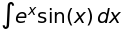

In [0]:
x=symbols('x')
a=Integral(sin(x)*exp(x),x)
a

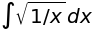

In [0]:
x = symbols('x')
Integral(sqrt(1 / x), x)

In [0]:

T,t = symbols('T t')
integrate(1/(T-20),T)

In [0]:
from sympy.abc import theta, lamda,omega
t = symbols('t')
integrate(0.5* omega + 2*sin(theta), t)

In [0]:
x = symbols('x')
f, g = symbols('f g', cls=Function)

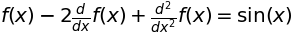

In [0]:
diffeq = Eq(f(x).diff(x, x) -2*f(x).diff(x) +f(x), sin(x))
diffeq

In [0]:
t = symbols ( 't')
x = Function('x')
# Solve the equation x''(t) - 2x'(t) + x(t) = sin(t).
ode = x(t).diff(t, t) - 2*x(t).diff(t) + x(t) - sin(t)
dsolve(ode, x(t))


Ejemplo 1
$$
y' + 4y = x^2 \quad y(0) = 1
$$
solución analítica es :
$$
y = \frac{31}{32}e^{-4x}+\frac{1}{4}x^2-\frac{1}{8}x+\frac{1}{32}
$$

In [0]:

x = symbols ('x')
y = Function('y')
# Solve the equation x''(t) - 2x'(t) + x(t) = sin(t).
ode = y(x).diff(x) - x**2+4*y(x)
sol = dsolve(ode, y(x))


In [0]:
constants = solve([sol.rhs.subs(x,0) - 1])
Cl = symbols('C1')
sol = sol.subs(constants)
simplify(sol)

In [0]:
func0 = lambdify(x,sol.rhs,'numpy')

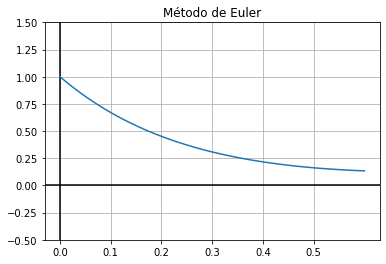

In [0]:
x_graf = np.linspace(0,0.6,100)
y_graf = func0(x_graf)

#plt.figure(figsize = (5.5,2) )
bottom, top = -0.5,1.5  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top

plt.xticks(np.arange(0, 0.6, 0.1))
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Método de Euler')
plt.plot(x_graf,y_graf)

plt.show()

Ejemplo 2
$$
y'' = -0.1y'-x \quad y(0) = 0 \quad y'(0) = 1
$$
solución analítica:
$$
y = 100x-5x^2+990(e^{-0.1x}-1)
$$

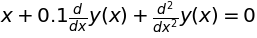

In [0]:
x = symbols ('x')
y = Function('y')
# Solve the equation x''(t) - 2x'(t) + x(t) = sin(t).
ode = y(x).diff(x,x) + x + 0.1* (y(x).diff(x))
sol1 = dsolve(ode, y(x))
Eq(ode)

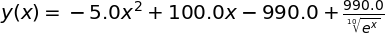

In [0]:
constants = solve([sol.rhs.subs(x,0) - 0, sol.rhs.diff(x,1).subs(x,0)-1])
Cl = symbols('C1, C2')
sol = sol.subs(constants)
simplify(sol)

In [0]:
checkodesol(sol1, sol)   

(True, 0)

In [0]:
func = lambdify(x,sol.rhs,'numpy')

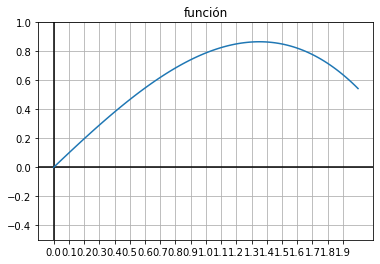

In [0]:
x_graf = np.linspace(0,2,100)
y_graf = func(x_graf)
bottom, top = -0.5,1  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top

plt.xticks(np.arange(0,2, 0.1))
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('función')
plt.plot(x_graf,y_graf)
plt.show()

Ejemplo 3
 $$
    y'' = g - \frac{C_D}{m}y'^2
    $$
    
Determinar el tiempo cuando ha descendido 500 m. Utilizar $g=9.8066 \,\, m/s^2$, $C_D= 0.2028\,\, kg/m $ y $m=80\,\, kg$

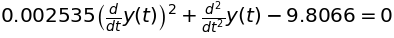

In [0]:
t = symbols ('t')
y = Function('y')
# Solve the equation x''(t) - 2x'(t) + x(t) = sin(t).
ode = y(t).diff(t,t) - 9.8066 + (0.2028/80) * (y(t).diff(t))**2 
Eq(ode)
#sol = dsolve(ode, y(t))

In [0]:
constants = solve([sol.rhs.subs(x,0) - 0, sol.rhs.diff(x,1).subs(x,0)-0])
Cl = symbols('C1, C2')
sol = sol.subs(constants)
simplify(sol)

Velocidad terminal $g+u'(t) = k * u(t)^2$

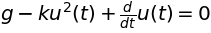

In [0]:
g, k ,t= symbols('g, k, t')
u = Function('u')
# Solve the equation x''(t) - 2x'(t) + x(t) = sin(t).
ode = u(t).diff(t) + g - k * u(t)**2 
Eq(ode)


In [0]:
sol = dsolve(ode, u(t))
sol
simplify(sol)

$$C_{1} = t - \frac{\sqrt{\frac{1}{g k}}}{2} \log{\left (- g \sqrt{\frac{1}{g k}} + u{\left (t \right )} \right )} + \frac{\sqrt{\frac{1}{g k}}}{2} \log{\left (g \sqrt{\frac{1}{g k}} + u{\left (t \right )} \right )}$$

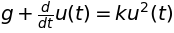

In [0]:
g, k = symbols('g, k')                                                                                                                
u = Function('u')                                                                                                                     
t = Symbol('t')                                                                                                                       
eq = Eq(g + u(t).diff(t), k * u(t)**2)                                                                                                
eq                                                                                                                                    
 

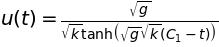

In [0]:
sol1 = dsolve(eq, hint='lie_group')   
sol1 

In [0]:
checkodesol(sol1, sol) 

NotImplementedError: ignored

In [0]:
def pend(y, t):
    b = 0.25
    c = 5.0
    return np.array([y[1], -b*y[1] - c*np.sin(y[0])])

In [0]:

y0 = np.array([np.pi - 0.1, 0.0])

In [0]:
t = np.linspace(0, 10, 101)

In [0]:
from scipy.integrate import *
sol = odeint(pend, y0, t)

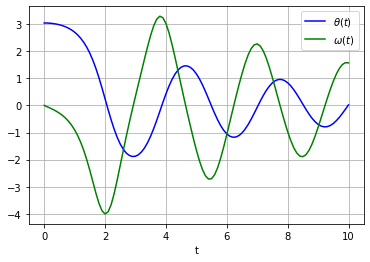

In [0]:
plt.plot(t, sol[:, 0], 'b', label=r'$\theta(t)$')
plt.plot(t, sol[:, 1], 'g', label=r'$\omega(t)$')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [0]:
from scipy.integrate import odeint

In [0]:
#function that returns dy/dt
def model(y,t):
    dydt = 1 + (t-y)**2
    return dydt

[[1.        ]
 [1.0404081 ]
 [1.08003195]
 [1.11891674]
 [1.1571043 ]
 [1.19463336]
 [1.23153985]
 [1.26785711]
 [1.30361615]
 [1.33884584]
 [1.37357311]
 [1.40782308]
 [1.44161922]
 [1.47498349]
 [1.50793646]
 [1.5404974 ]
 [1.57268441]
 [1.60451448]
 [1.63600361]
 [1.66716683]
 [1.6980183 ]
 [1.7285714 ]
 [1.75883872]
 [1.78883217]
 [1.81856301]
 [1.84804189]
 [1.87727889]
 [1.90628354]
 [1.93506491]
 [1.96363158]
 [1.99199171]
 [2.02015304]
 [2.04812294]
 [2.0759084 ]
 [2.1035161 ]
 [2.13095238]
 [2.15822328]
 [2.1853346 ]
 [2.21229181]
 [2.23910019]
 [2.26576473]
 [2.29229025]
 [2.31868132]
 [2.34494233]
 [2.37107747]
 [2.39709076]
 [2.42298604]
 [2.44876701]
 [2.47443721]
 [2.50000001]]


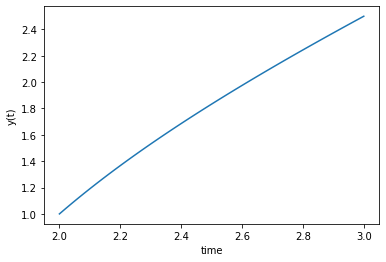

In [0]:

# initial condition
y0 = 1

# time points
t = np.linspace(2,3)

# solve ODE
y = odeint(model,y0,t)
print(y)
# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

In [0]:
def model(y,t):
    dydt = 1 -y
    return dydt

In [0]:
# initial condition
y0 = 0

# time points
t = np.linspace(0,5)

# solve ODE
y = odeint(model,y0,t)
#print(y)
# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

In [0]:
from sympy import *
x, R = symbols('x R')
init_printing(use_unicode=True)
f = R*( x**3+x**2-1)
a = diff(f,x)
a


In [0]:
simplify(a)

In [0]:
p = lambdify('x',a)

In [0]:
p(1)